In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline

import cv2
bgr = cv2.imread('astronaut.png')
RGB = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)

## run CLAHE on luminosity only

In [2]:
# create CLAHE instance
gridsize =5
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(gridsize,gridsize))

# apply CLAHE to intensity channel only
lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
lab[...,0] = clahe.apply(lab[...,0])
bgr_CLAHE = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

# convert back to RGB
Lum_CLAHE = cv2.cvtColor(bgr_CLAHE,cv2.COLOR_BGR2RGB)

## run CLAHE on RGB

In [3]:
RGB_CLAHE = np.zeros(RGB.shape)

# apply to each color channel
RGB_CLAHE[...,0] = clahe.apply(RGB[...,0])
RGB_CLAHE[...,1] = clahe.apply(RGB[...,1])
RGB_CLAHE[...,2] = clahe.apply(RGB[...,2])

# CLAHE returns floats -> conversion to range 0 .... 1 for imshow
RGB_CLAHE /=255  

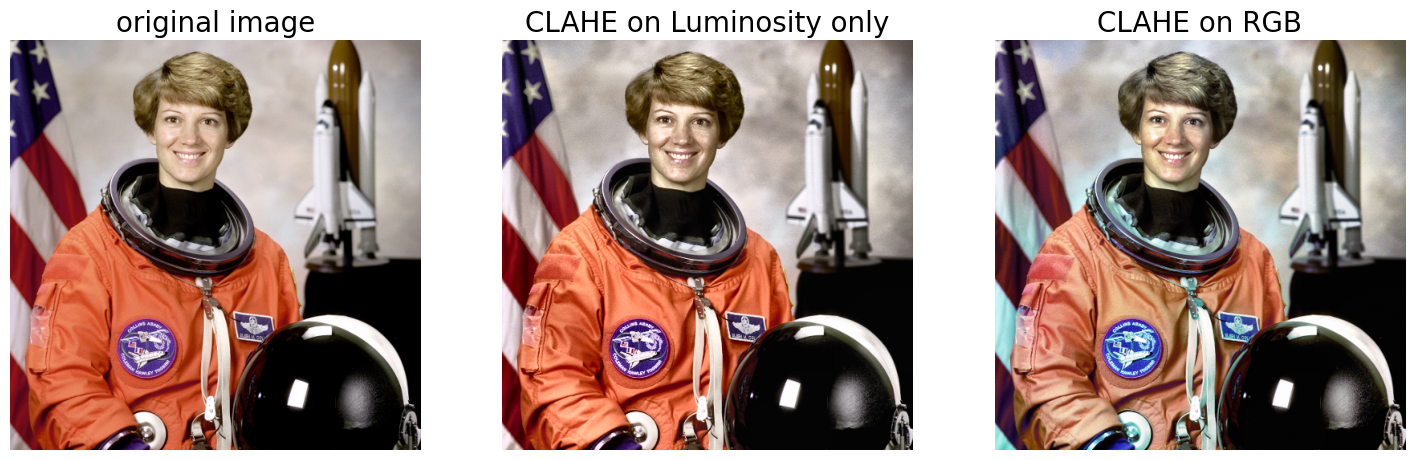

In [4]:
plt.figure(figsize=(18,10))

plt.subplot(131)
plt.imshow(RGB)
plt.axis('off')
plt.title('original image', fontsize=20)

plt.subplot(132)
plt.imshow(Lum_CLAHE)
plt.title('CLAHE on Luminosity only', fontsize=20)
plt.axis('off')

plt.subplot(133)
plt.imshow(RGB_CLAHE)
plt.axis('off')
plt.title('CLAHE on RGB', fontsize=20)

plt.show()